In [3]:
# Importing the necessary libraries and packages
# Importing the VGG16 model from Keras
from keras.applications.vgg16 import VGG16 

# Importing the ResNet50 model from TensorFlow
from tensorflow.keras.applications.resnet50 import ResNet50 

# Importing the Model class from Keras
from keras.models import Model                 

# Importing the image preprocessing module from Keras
from keras.preprocessing import image          

# Importing the necessary layers from TensorFlow Keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout 

# Importing NumPy for numerical operations
import numpy as np                             

# Importing TensorFlow
import tensorflow as tf                        

# Importing Matplotlib for visualization
import matplotlib.pyplot as plt                

# Configuring Matplotlib for inline plotting
%matplotlib inline                              

# Importing the os module for file operations
import os                                      

 # Importing OpenCV for image processing
import cv2                                    

# Setting the directory path for training data
train_dir = "./training_set"

# Setting the directory path for test data
eval_dir = "./test_set"


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [4]:
# Defining a helper function to load images from given directories
import keras  # Importing Keras

def load_images(directory):
    images = []    # Initializing an empty list to store images
    labels = []    # Initializing an empty list to store labels
    for idx, label in enumerate(uniq_labels):   # Iterating through the list of unique labels

        for file in os.listdir(directory + "/" + label):   # Iterating through the files in the given directory and label
            
            filepath = directory + "/" + label + "/" + file    # Getting the file path
            image = cv2.resize(cv2.imread(filepath), (224, 224))   # Reading and resizing the image using OpenCV
            images.append(image)    # Appending the image to the list of images
            labels.append(idx)      # Appending the label index to the list of labels
    images = np.array(images)      # Converting the list of images to a NumPy array
    labels = np.array(labels)      # Converting the list of labels to a NumPy array
    return(images, labels)         # Returning the images and labels as NumPy arrays

# Getting the list of unique labels from the training directory
uniq_labels = sorted(os.listdir(train_dir))
uniq_labels.remove('.DS_Store')   # Removing the .DS_Store file from the list of labels if present

# Loading the images and labels from the training directory
images, labels = load_images(directory = train_dir)

# Getting the list of unique labels from the evaluation directory
uniq_labels_eval=sorted(os.listdir(eval_dir))
uniq_labels_eval.remove('.DS_Store')   # Removing the .DS_Store file from the list of labels if present

# Checking if the list of unique labels from the training and evaluation directory are the same
if uniq_labels == uniq_labels_eval :
    # Loading the images and labels from the evaluation directory if the labels are the same
    X_eval, y_eval = load_images(directory = eval_dir)


In [5]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split

# Splitting the images and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

# Getting the number of unique labels, training images, and testing images
n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

# Printing the total number of unique symbols, number of training images, and number of testing images
print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

# Getting the number of evaluation images
eval_n = len(X_eval)

# Printing the number of evaluation images
print("Number of evaluation images: ", eval_n)


Total number of symbols:  39
Number of training images:  47068
Number of testing images:  11768
Number of evaluation images:  7800


In [6]:
X_train.shape

(47068, 224, 224, 3)

In [7]:
# Converting the labels to categorical arrays for training, testing, and evaluation datasets
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [8]:
# Printing the categorical label of the first image in the training set
print(y_train[0])

# Printing the length of the categorical label
print(len(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
39


In [9]:
# Converting the pixel values of the images to float and scaling them between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_eval = X_eval.astype('float32') / 255.0


In [10]:
# Initializing VGG16 and ResNet50 models with ImageNet weights and without the top layer
# The input shape is (64, 64, 3) as our images are resized to 64x64 pixels and have 3 color channels (RGB)
classifier_vgg16 = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
classifier_resnet = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

2023-04-03 23:40:58.329874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Setting the layers of the pre-trained models as non-trainable
# We don't want to update the weights of the pre-trained models during training
for layer in classifier_vgg16.layers:
    layer.trainable = False

for layer in classifier_resnet.layers:
    layer.trainable = False


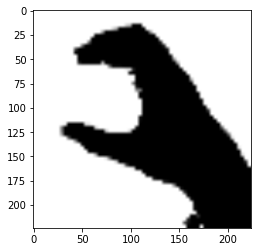

In [12]:
plt.imshow(X_test[0])

In [13]:
#VGG16
# Getting the output of the VGG16 convolutional base as input for the new model
classifier1 = classifier_vgg16.output

# Adding a flatten layer to convert the output into a 1D feature vector
classifier1 = Flatten()(classifier1)

# Adding a fully connected dense layer with 256 units and ReLU activation
classifier1 = Dense(units=256, activation='relu')(classifier1)

# Adding a dropout layer to prevent overfitting
classifier1 = Dropout(0.3)(classifier1)

# Adding the output layer with softmax activation and 39 units (number of classes)
classifier1 = Dense(units=39, activation='softmax')(classifier1)

# Creating the final model using the VGG16 convolutional base as input and the new classifier as output
model = Model(inputs = classifier_vgg16.input , outputs = classifier1)

# Compiling the model with Adam optimizer, categorical crossentropy loss and accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the summary of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
# Train the model on training data and evaluate on testing data for 5 epochs 
history = model.fit(X_train, y_train, epochs =5, batch_size =32,validation_data=(X_test,y_test))

# Save the trained model
model.save('model_vgg16_new.h5')

Epoch 1/5
   3/1471 [..............................] - ETA: 5:47:19 - loss: 5.8170 - accuracy: 0.0625

KeyboardInterrupt: 

In [42]:
# Defining the head model for resnet50
classifier2 = classifier_resnet.output
classifier2 = Flatten()(classifier2) # Adding a layer of flatten
classifier2 = Dense(units=256, activation='relu')(classifier2)
classifier2 = Dropout(0.2)(classifier2)
classifier2 = Dense(units=39, activation='softmax')(classifier2)

# Initializing the model with resnet50 as the base
model2 = Model(inputs=classifier_resnet.input, outputs=classifier2)

# Compiling the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the summary of the model
model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

CHANGE THIS LATER

In [43]:
# Train the ResNet50 model
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save the trained ResNet50 model
model2.save('model_resnet.h5')


1471/1471 [==============================] - 742s 499ms/step - loss: 0.3036 - accuracy: 0.9254 - val_loss: 0.0065 - val_accuracy: 0.9995


In [66]:
# Evaluating accuracy on the test images for VGG16 model
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

# Evaluating accuracy on the evaluation images for VGG16 model
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

# Evaluating accuracy on the test images for ResNet50 model
score = model2.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

# Evaluating accuracy on the evaluation images for ResNet50 model
score = model2.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')


KeyboardInterrupt: 

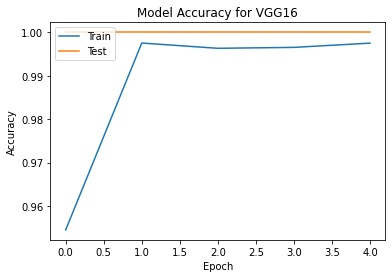

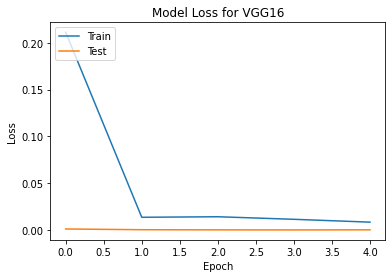

In [14]:
# Visualizing accuracy and loss for VGG16 model
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for VGG16')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


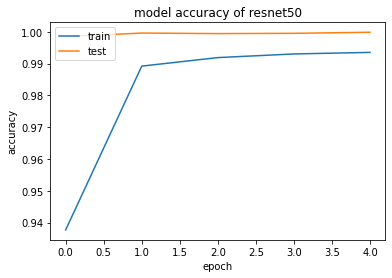

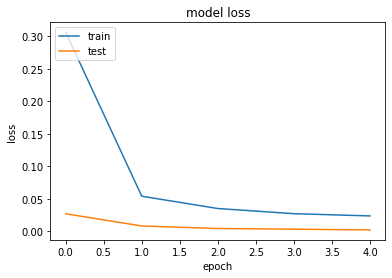

In [15]:
#resnet50
# summarize history for accuracy
import matplotlib.pyplot as plt

# plot the training accuracy and validation accuracy for resnet50 model
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy of resnet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the training loss and validation loss for resnet50 model
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
import gradio as gr
from tensorflow.keras.models import load_model

# Load the saved model
model_VGG = load_model('model_vgg16.h5')

In [17]:
import numpy as np
import keras.utils as image

class_names=['1','10','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Best of luck','I love you','space']

1/1 [==============================] - 0s 123ms/step
space


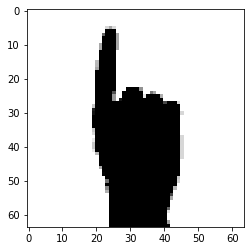

In [95]:
# for only one prediction
import numpy as np
from keras.utils import load_img, img_to_array
result=[]
test_image = image.load_img('test_set/1/11.png',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model2.predict(test_image)

if result[0][0] == np.max(result[0]):             
    prediction = '1'
elif result[0][1] == np.max(result[0]):
    prediction = '10'
elif result[0][2] == np.max(result[0]):
    prediction = '2'
elif result[0][3] == np.max(result[0]):
    prediction = '3'
elif result[0][4] == np.max(result[0]):
    prediction = '4'
elif result[0][5] == np.max(result[0]):
    prediction = '5'
elif result[0][6] == np.max(result[0]):
    prediction = '6'
elif result[0][7] == np.max(result[0]):
    prediction = '7'
elif result[0][8] == np.max(result[0]):
    prediction = '8'
elif result[0][9] == np.max(result[0]):
    prediction = '9'
elif result[0][10] == np.max(result[0]):
    prediction = 'A'
elif result[0][11] == np.max(result[0]):
    prediction = 'B'
elif result[0][12] == np.max(result[0]):
    prediction = 'C'
elif result[0][13] == np.max(result[0]):
    prediction = 'D'
elif result[0][14] == np.max(result[0]):
    prediction = 'E'
elif result[0][15] == np.max(result[0]):
    prediction = 'F'
elif result[0][16] == np.max(result[0]):
    prediction = 'G'
elif result[0][17] == np.max(result[0]):
    prediction = 'H'
elif result[0][18] == np.max(result[0]):
    prediction = 'I'
elif result[0][19] == np.max(result[0]):
    prediction = 'J'
elif result[0][20] == np.max(result[0]):
    prediction = 'K'
elif result[0][21] == np.max(result[0]):
    prediction = 'L'
elif result[0][22] == np.max(result[0]):
    prediction = 'M'
elif result[0][23] == np.max(result[0]):
    prediction = 'N'
elif result[0][24] == np.max(result[0]):
    prediction = 'O'
elif result[0][25] == np.max(result[0]):
    prediction = 'P'
elif result[0][26] == np.max(result[0]):
    prediction = 'Q'
elif result[0][27] == np.max(result[0]):
    prediction = 'R'
elif result[0][28] == np.max(result[0]):
    prediction = 'S'
elif result[0][29] == np.max(result[0]):
    prediction = 'T'
elif result[0][30] == np.max(result[0]):
    prediction = 'U'
elif result[0][31] == np.max(result[0]):
    prediction = 'V'
elif result[0][32] == np.max(result[0]):
    prediction = 'W'
elif result[0][33] == np.max(result[0]):
    prediction = 'X'
elif result[0][34] == np.max(result[0]):
    prediction = 'Y'
elif result[0][35] == np.max(result[0]):
    prediction = 'Z'
elif result[0][36] == np.max(result[0]):
    prediction = 'best of luck'
elif result[0][37] == np.max(result[0]):
    prediction = 'i love you'
elif result[0][38] == np.max(result[0]):
    prediction = 'space'
else:
    prediction = '  '
    
print(prediction)

In [74]:
# for i in result[0]:
#     if i!=1:
#         print(i)
np.max(result)

1.0

In [91]:
uniq_labels

['1',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'best of luck',
 'i love you',
 'space']